In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
# load the dataset
file_path = 'C:/Users/7PSYCHOPATH/Documents/York/Fall/Data Science/Project/dataset.csv'
data = pd.read_csv(file_path)

# display dataset structure
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  livene

In [ ]:
# drop rows with missing artist, album_name, or track_name (essential columns)
data_cleaned = data.dropna(subset=['artists', 'album_name', 'track_name'])

# convert duration from milliseconds to minutes and store it in a new column 'duration_min'
data_cleaned['duration_min'] = data_cleaned['duration_ms'] / 60000

# check if the column 'Unnamed: 0' exists, and drop it if it does (it's unnecessary)
if 'Unnamed: 0' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['Unnamed: 0'])

# display the cleaned datasetand first few rows
print("Cleaned Dataset Info:")
data_cleaned.info()

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  val

C:\Users\7PSYCHOPATH\AppData\Local\Temp\ipykernel_5308\1797922995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['duration_min'] = data_cleaned['duration_ms'] / 60000


In [19]:
data_cleaned.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217


- Initial dataset had 114,000 entries and 21 columns, with minor missing values in the columns (artists, album_name, track_name).
- After cleaning, we have 113,999 rows and added a new column duration_min (converted duration from milliseconds to minutes).

---

***RESEARCH QUESTION 1***

**Sub Question 1**
- Investigate how the presence of highly popular tracks in an album affects the popularity of other tracks.
- Analyze popularity thresholds and group albums accordingly.


Popularity Threshold (80th percentile): 54.0
Average Popularity - Albums With Highly Popular Tracks: 60.7616682393952
Average Popularity - Albums Without Highly Popular Tracks: 31.204055216959063


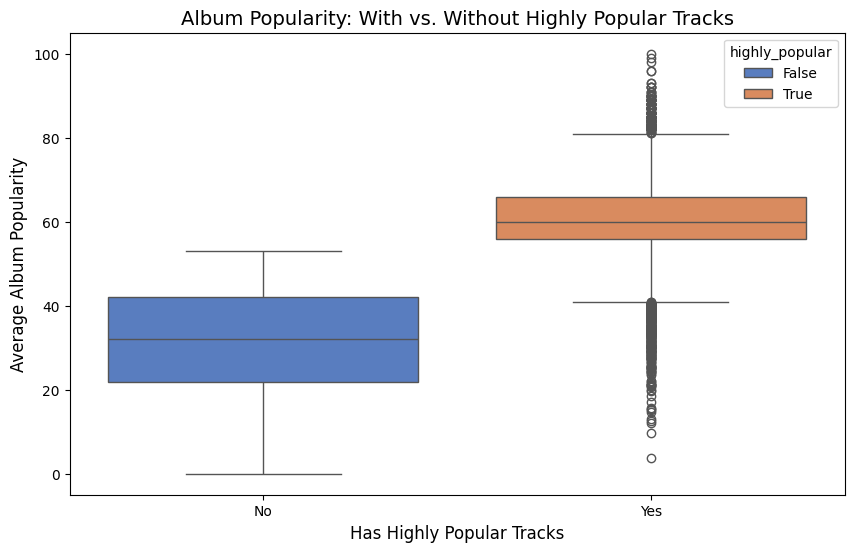

In [ ]:
#calculate popularity thresholds and analyze the relationship:

# defines highly popular tracks as those with popularity above the 80th percentile
popularity_threshold = data_cleaned['popularity'].quantile(0.8)
data_cleaned['is_highly_popular'] = data_cleaned['popularity'] >= popularity_threshold

# group the data by album and calculate the average popularity of tracks and whether the album has any highly popular tracks
album_popularity = data_cleaned.groupby('album_name').agg(
    album_popularity=('popularity', 'mean'),  # calculate average popularity of the album
    highly_popular=('is_highly_popular', 'max')   # check if album has any highly popular track
).reset_index()

# calculate the average popularity for albums without highly popular tracks
avg_with_popular = album_popularity[album_popularity['highly_popular'] == True]['album_popularity'].mean()
avg_without_popular = album_popularity[album_popularity['highly_popular'] == False]['album_popularity'].mean()

print(f"Popularity Threshold (80th percentile): {popularity_threshold}")
print(f"Average Popularity - Albums With Highly Popular Tracks: {avg_with_popular}")
print(f"Average Popularity - Albums Without Highly Popular Tracks: {avg_without_popular}")

#create a box plot for album popularity
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=album_popularity,
    x='highly_popular', # shows if album has highly popular tracks (yes/no)
    y='album_popularity',  # shows the average album popularity
    hue='highly_popular',
    palette="muted"
)
plt.title("Album Popularity: With vs. Without Highly Popular Tracks", fontsize=14)
plt.xlabel("Has Highly Popular Tracks", fontsize=12)
plt.ylabel("Average Album Popularity", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

**Conclusion:**

Albums with at least one highly popular track tend to have a higher average popularity overall. This supports the hypothesis that highly popular tracks can positively influence the listener engagement for other tracks on the same album.

---

**Next Steps:**

I'll test whether this observed difference in popularity is statistically significant using a t-test to compare the means of the two groups (albums with and without highly popular tracks).

In [ ]:
# select albums with and without highly popular tracks
with_highly_popular = album_popularity[album_popularity['highly_popular'] == True]['album_popularity']
without_highly_popular = album_popularity[album_popularity['highly_popular'] == False]['album_popularity']

# perform a t-test to compare the two groups
t_stat, p_value = ttest_ind(with_highly_popular, without_highly_popular, equal_var=False)  # assuming unequal variance

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 265.73899914904536
P-value: 0.0


- **T-Statistic:** 265.74 shows a large difference between the means of the two groups (albums with and without highly popular tracks), relative to the variability within the groups.

- **P-Value:** 0, This is far below any significance level (e.g., 0.05), meaning the result is statistically significant.

**Conclusion:**
- The difference in average album popularity between albums with and without highly popular tracks is highly significant. 
- This supports the hypothesis that highly popular tracks positively influence the popularity of other tracks in the same album.

---

***Next, Sub Question 2***

- Investigate if popular tracks influence the popularity of other tracks within the same album, particularly if they share similar attributes.

In [ ]:
# Comparing attributes across albums

# select tracks that are highly popular
popular_tracks = data_cleaned[data_cleaned['is_highly_popular'] == True]
# calculate the means for highly popular tracks
mean_popular_tracks = popular_tracks.groupby('album_name')[[
    'energy', 'danceability', 'tempo', 'valence', 'acousticness', 'loudness'
]].mean()

# merged the mean values with the original dataset
data_with_means = data_cleaned.merge(mean_popular_tracks, on='album_name', suffixes=('', '_popular'))

# then, caalculated similarity for each attribute and mean value of the highly popular tracks
data_with_means['energy_similarity'] = abs(data_with_means['energy'] - data_with_means['energy_popular'])
data_with_means['danceability_similarity'] = abs(data_with_means['danceability'] - data_with_means['danceability_popular'])
data_with_means['tempo_similarity'] = abs(data_with_means['tempo'] - data_with_means['tempo_popular'])
data_with_means['valence_similarity'] = abs(data_with_means['valence'] - data_with_means['valence_popular'])
data_with_means['acousticness_similarity'] = abs(data_with_means['acousticness'] - data_with_means['acousticness_popular'])
data_with_means['loudness_similarity'] = abs(data_with_means['loudness'] - data_with_means['loudness_popular'])

# after that, calculated correlations between similarities and popularity
corr_energy_similarity = data_with_means['energy_similarity'].corr(data_with_means['popularity'])
corr_dance_similarity = data_with_means['danceability_similarity'].corr(data_with_means['popularity'])
corr_tempo_similarity = data_with_means['tempo_similarity'].corr(data_with_means['popularity'])
corr_valence_similarity = data_with_means['valence_similarity'].corr(data_with_means['popularity'])
corr_acousticness_similarity = data_with_means['acousticness_similarity'].corr(data_with_means['popularity'])
corr_loudness_similarity = data_with_means['loudness_similarity'].corr(data_with_means['popularity'])

# print the correlations
print(f"Correlation between Energy Similarity and Popularity: {corr_energy_similarity}")
print(f"Correlation between Danceability Similarity and Popularity: {corr_dance_similarity}")
print(f"Correlation between Tempo Similarity and Popularity: {corr_tempo_similarity}")
print(f"Correlation between Valence Similarity and Popularity: {corr_valence_similarity}")
print(f"Correlation between Acousticness Similarity and Popularity: {corr_acousticness_similarity}")
print(f"Correlation between Loudness Similarity and Popularity: {corr_loudness_similarity}")


Correlation between Energy Similarity and Popularity: -0.43092321338637724
Correlation between Danceability Similarity and Popularity: -0.4348955371790568
Correlation between Tempo Similarity and Popularity: -0.3394327166372887
Correlation between Valence Similarity and Popularity: -0.39597048393195355
Correlation between Acousticness Similarity and Popularity: -0.3932460030623395
Correlation between Loudness Similarity and Popularity: -0.4038323294694597


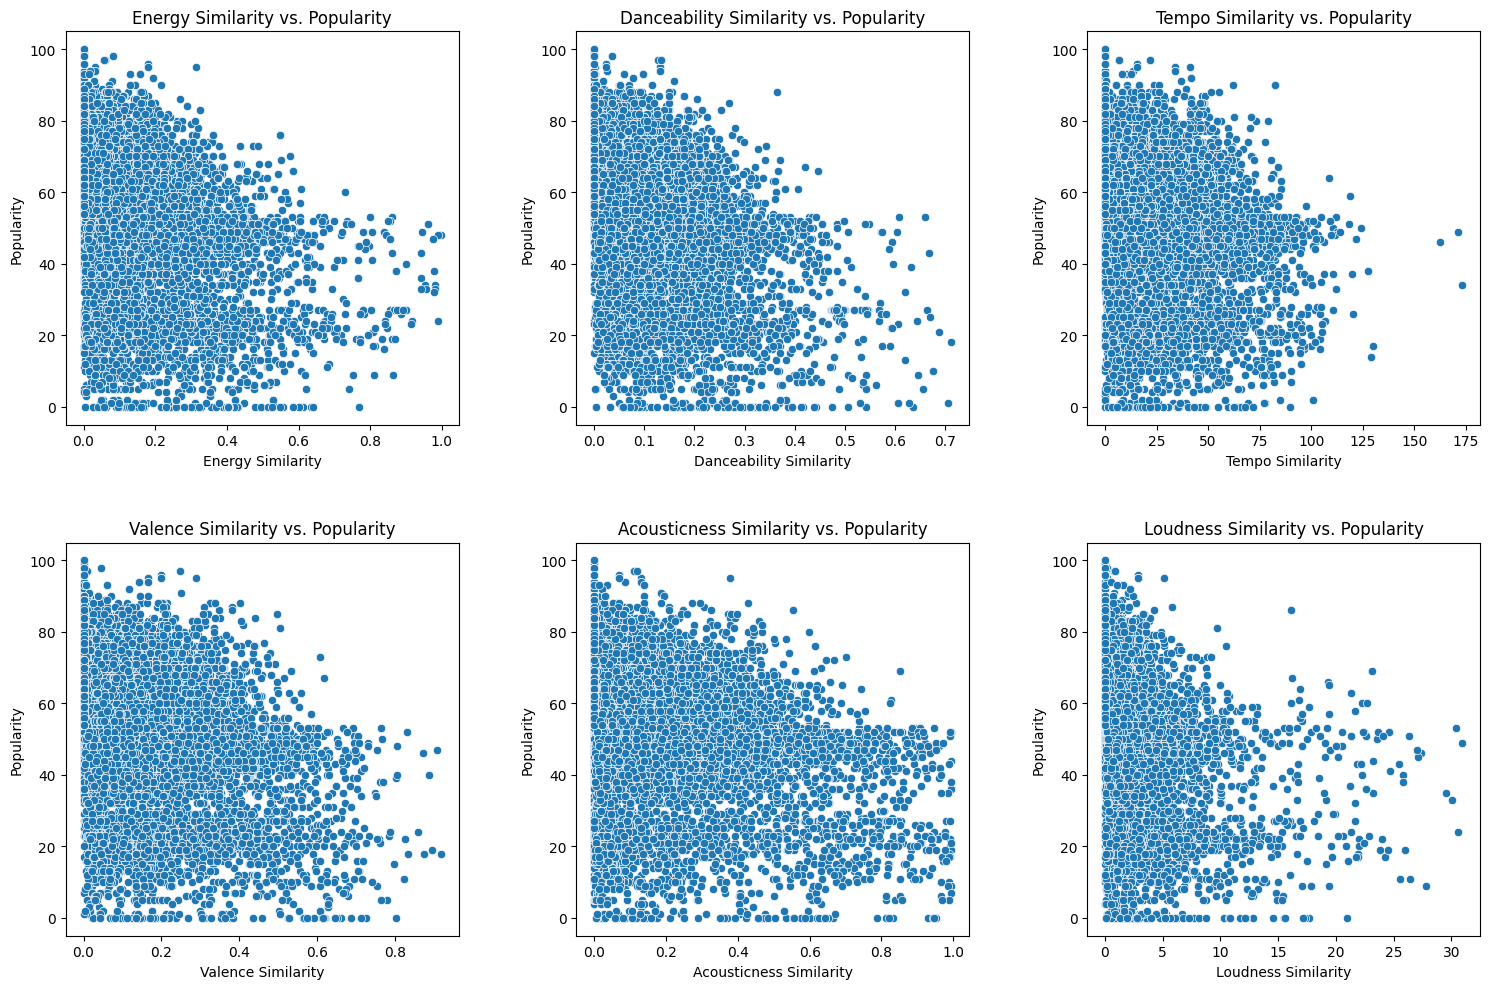

In [34]:
# list of the attributes
attributes = ['energy', 'danceability', 'tempo', 'valence', 'acousticness', 'loudness']

# created a subplot with multiple scatter plots
plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(2, 3, i)  # Create a grid of 2 rows and 3 columns for the plots
    sns.scatterplot(data=data_with_means, x=f'{attribute}_similarity', y='popularity')
    plt.title(f'{attribute.capitalize()} Similarity vs. Popularity', fontsize=12)
    plt.xlabel(f'{attribute.capitalize()} Similarity')
    plt.ylabel('Popularity')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

- The negative correlations across all six attributes tells that tracks with similar characteristics (energy, danceability, tempo, valence, acousticness, loudness) to the popular track in the album tend to be less popular.

- Diversity in characteristics (whether it's energy, danceability, or any of the other attributes) across the album seems to drive greater popularity. This implies that albums with different musical qualities might be more engaging and attract higher listener interaction than albums where tracks have very similar features to the popular track.

**Conclusion:**
- The analysis shows that shared characteristics between tracks in an album and the highly popular track do not drive more interaction or popularity. Instead, variety across different musical attributes seems to play a bigger role in boosting engagement and popularity.

---

***RESEARCH QUESTION 2***

**Sub Question 1**
- Compare attributes like danceability, energy, tempo, etc., in collaborative vs. solo tracks.
- Visualize these distributions using box plots.

Average Musical Attributes for Solo vs. Collaborative Tracks:
                  danceability    energy       tempo   valence  acousticness  \
is_collaboration                                                               
False                 0.566904  0.641634  122.163831  0.474195       0.31478   
True                  0.523690  0.537126  115.425846  0.420128       0.36775   

                   loudness  
is_collaboration             
False             -8.253628  
True             -10.475886  


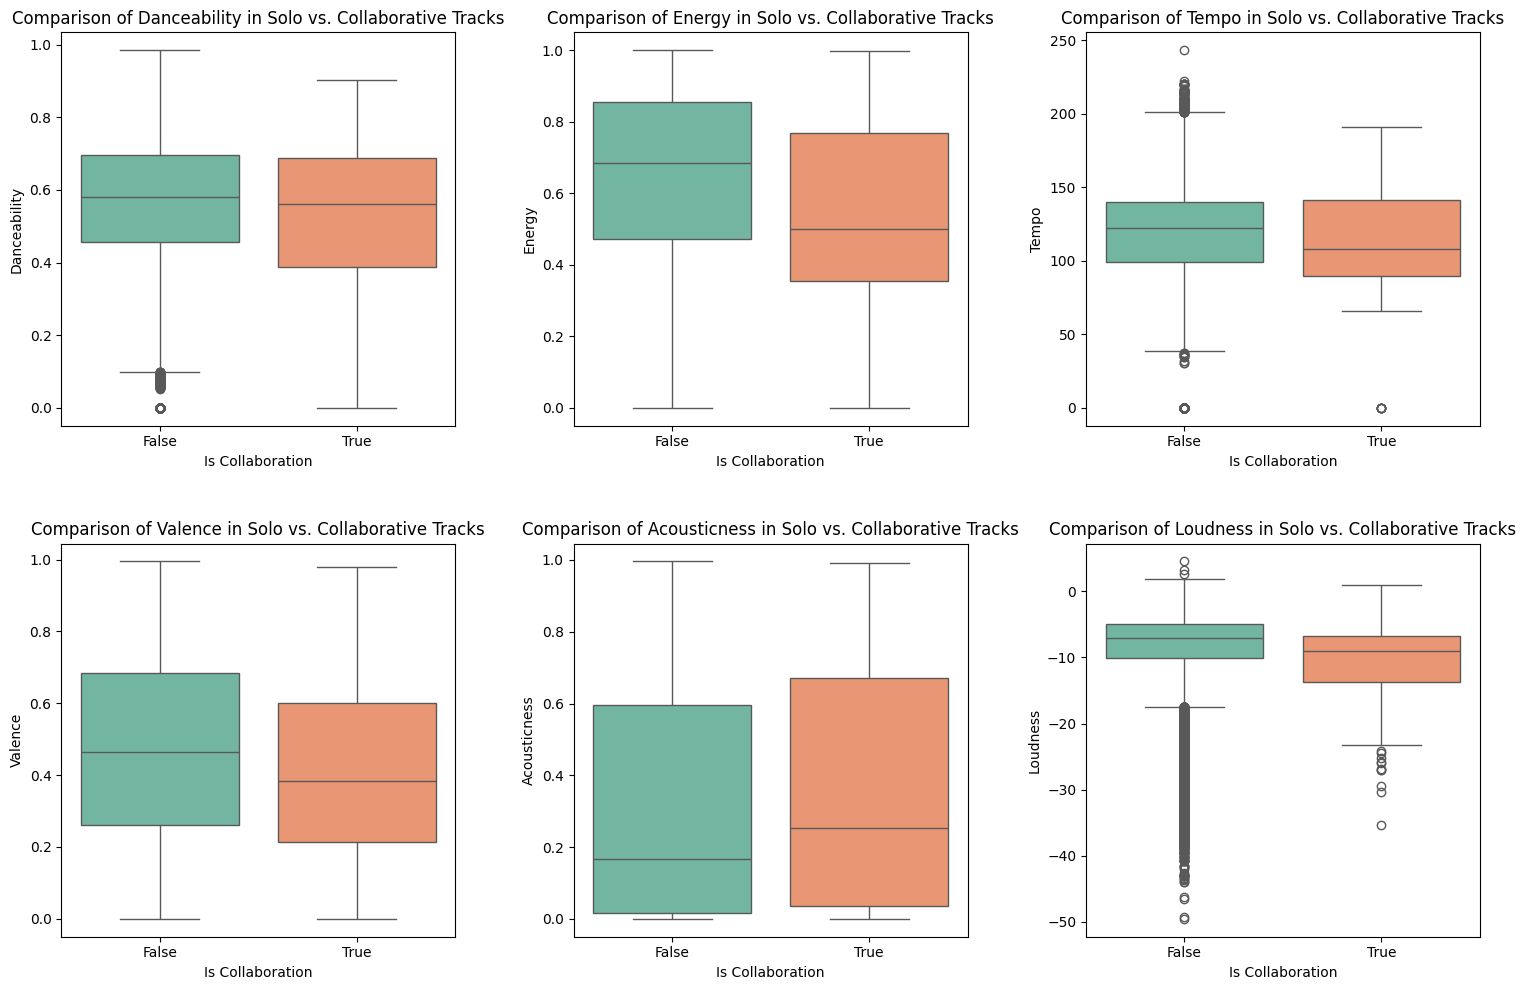

In [67]:
# creates new column to identify collaborative tracks
data_cleaned['is_collaboration'] = data_cleaned['artists'].apply(lambda x: ',' in x)

# group data by solo and collaborative tracks and  then calculates the mean for attributes
attributes = ['danceability', 'energy', 'tempo', 'valence', 'acousticness', 'loudness']
collab_stats = data_cleaned.groupby('is_collaboration')[attributes].mean()

# shows results
print("Average Musical Attributes for Solo vs. Collaborative Tracks:")
print(collab_stats)


# create a figure to hold all subplots
plt.figure(figsize=(15, 10))
# loop through each attribute and create a boxplot
for i, attribute in enumerate(attributes, 1):
    plt.subplot(2, 3, i)  # specify the grid position (2 rows, 3 columns)
    sns.boxplot(x='is_collaboration', y=attribute, data=data_cleaned, hue='is_collaboration', palette="Set2", legend=False)
    plt.title(f'Comparison of {attribute.capitalize()} in Solo vs. Collaborative Tracks', fontsize=12)
    plt.xlabel("Is Collaboration")
    plt.ylabel(attribute.capitalize())
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3) 
plt.show()


**Danceability:** 
- Solo tracks (0.567) are slightly more danceable on average than collaborative tracks (0.524).
- This might indicate a preference for solo artists to create rhythmically engaging tracks.

**Energy:**
- Solo tracks (0.642) are generally more energetic than collaborative tracks (0.537).
- Collaborative tracks might lean towards calmer or softer styles.

**Tempo:**
- Solo tracks have a higher average tempo (122.16 BPM) compared to collaborative tracks (115.43 BPM).
- This suggests that solo tracks may be more upbeat on average.

**Valence:**
- Solo tracks (0.474) are slightly happier/more positive than collaborative tracks (0.420).

**Acousticness:**
- Collaborative tracks (0.368) are more acoustic than solo tracks (0.315), indicating collaborations to use more organic sounds.

**Loudness:**
- Solo tracks are louder on average (-8.25 dB) compared to collaborative tracks (-10.48 dB).
- This supports the idea that collaborative tracks might prioritize balance or softer production.

***Next,***

- Perform statistical tests to determine if the differences in attributes are statistically significant.

In [ ]:
# statistical test for differences between solo and collaborative tracks

# initialize an empty dictionary to store the results
t_test_results = {}

# perform t-tests for each attribute
for attribute in attributes:
    solo_values = data_cleaned[data_cleaned['is_collaboration'] == False][attribute]
    collab_values = data_cleaned[data_cleaned['is_collaboration'] == True][attribute]
    
    t_stat, p_value = ttest_ind(solo_values, collab_values, equal_var=False)
    t_test_results[attribute] = {"t_statistic": t_stat, "p_value": p_value}

# shows results
print("T-test Results for Solo vs. Collaborative Tracks:")
for attribute, result in t_test_results.items():
    print(f"{attribute.capitalize()}: T-statistic = {result['t_statistic']}, P-value = {result['p_value']}")

T-test Results for Solo vs. Collaborative Tracks:
Danceability: T-statistic = 3.2943894589965175, P-value = 0.001116726815267361
Energy: T-statistic = 6.372920244909593, P-value = 7.856270159081884e-10
Tempo: T-statistic = 2.927348437802663, P-value = 0.0037068227566671207
Valence: T-statistic = 3.3215445400063635, P-value = 0.001017187379827799
Acousticness: T-statistic = -2.5334600348561267, P-value = 0.011853766869537393
Loudness: T-statistic = 5.986426135712806, P-value = 6.73216611845558e-09


**Danceability: (T-statistic = 3.29, P-value = 0.0011)**
- The p-value is small (less than 0.05), showing a statistically significant difference in danceability between solo and collaborative tracks. 
- Solo tracks are significantly more danceable than collaborative tracks.

**Energy: (T-statistic = 6.37, P-value < 0.0001)**
- The very low p-value shows a strong and statistically significant difference in energy. 
- Solo tracks are significantly more energetic than collaborative ones.

**Tempo: (T-statistic = 2.93, P-value = 0.0037)**
- The p-value is below 0.05, meaning the difference in tempo is statistically significant. 
- Solo tracks have a higher tempo compared to collaborative tracks.

**Valence: (T-statistic = 3.32, P-value = 0.0010)**
- The p-value shows a significant difference in valence, with solo tracks being slightly more positive (higher valence) than collaborative ones.

**Acousticness: (T-statistic = -2.53, P-value = 0.0119)**
- The p-value shows a statistically significant difference in acousticness. 
- Collaborative tracks are more acoustic than solo tracks.

**Loudness: (T-statistic = 5.99, P-value < 0.0001)**
- A highly significant difference in loudness, with solo tracks being louder than collaborative tracks.

**Conclusion:**
- In conclusion, solo tracks are generally more energetic, faster, and more danceable than collaborative tracks. 

--

***Then,  Sub question 2***
 - Analyze these results across genres

In [37]:
# group data by genre and collaboration status to calculate mean attributes
genre_collab_stats = data_cleaned.groupby(['track_genre', 'is_collaboration'])[attributes].mean().reset_index()

print(genre_collab_stats.head())

   track_genre  is_collaboration  danceability    energy       tempo  \
0     acoustic             False      0.549643  0.435039  119.002728   
1     acoustic              True      0.500000  0.764000  126.899000   
2     afrobeat             False      0.669580  0.702812  119.213337   
3     alt-rock             False      0.534493  0.754173  124.634404   
4  alternative             False      0.559927  0.720030  122.232394   

    valence  acousticness  loudness  
0  0.423480      0.567216 -9.449458  
1  0.966000      0.168000 -7.834000  
2  0.698619      0.270860 -7.789353  
3  0.518260      0.122162 -6.191489  
4  0.495570      0.147820 -6.078777  


In [38]:
# calculate counts of solo and collaborative tracks per genre
genre_collab_counts = data_cleaned.groupby(['track_genre', 'is_collaboration']).size().unstack(fill_value=0)
print("Track counts per genre:\n")
print(genre_collab_counts)


Track counts per genre:

is_collaboration  False  True 
track_genre                   
acoustic            999      1
afrobeat           1000      0
alt-rock           1000      0
alternative        1000      0
ambient            1000      0
...                 ...    ...
techno             1000      0
trance              997      3
trip-hop            999      1
turkish            1000      0
world-music         989     11

[114 rows x 2 columns]


In [39]:
# filter genres with at least 5 tracks in both groups
valid_genres = genre_collab_counts[(genre_collab_counts[False] >= 5) & (genre_collab_counts[True] >= 5)].index
filtered_data = data_cleaned[data_cleaned['track_genre'].isin(valid_genres)]
print("Valid genres with sufficient data:\n", valid_genres)


Valid genres with sufficient data:
 Index(['blues', 'disco', 'emo', 'jazz', 'metalcore', 'opera', 'psych-rock',
       'punk', 'sad', 'show-tunes', 'sleep', 'study', 'world-music'],
      dtype='object', name='track_genre')


In [40]:
# run T-tests for filtered genres
genre_t_test_results = {}

for genre in valid_genres:
    genre_data = filtered_data[filtered_data['track_genre'] == genre]
    
    for attribute in attributes:
        solo_values = genre_data[genre_data['is_collaboration'] == False][attribute]
        collab_values = genre_data[genre_data['is_collaboration'] == True][attribute]
        
        # perform T-test if both groups have sufficient data
        if len(solo_values) > 1 and len(collab_values) > 1:
            t_stat, p_value = ttest_ind(solo_values, collab_values, equal_var=False)
            genre_t_test_results[(genre, attribute)] = {"t_statistic": t_stat, "p_value": p_value}
        else:
            genre_t_test_results[(genre, attribute)] = {"t_statistic": None, "p_value": None}

# display filtered T-test results
print("T-test Results for Valid Genres:")
for (genre, attribute), result in genre_t_test_results.items():
    t_stat = result["t_statistic"]
    p_value = result["p_value"]
    if t_stat is not None:
        print(f"Genre: {genre}, Attribute: {attribute.capitalize()}, T-stat = {t_stat:.2f}, P-value = {p_value:.4f}")
    else:
        print(f"Genre: {genre}, Attribute: {attribute.capitalize()}, Insufficient data for T-test.")

T-test Results for Valid Genres:
Genre: blues, Attribute: Danceability, T-stat = -0.34, P-value = 0.7520
Genre: blues, Attribute: Energy, T-stat = 6.33, P-value = 0.0028
Genre: blues, Attribute: Tempo, T-stat = -0.71, P-value = 0.5186
Genre: blues, Attribute: Valence, T-stat = 1.79, P-value = 0.1445
Genre: blues, Attribute: Acousticness, T-stat = -4.22, P-value = 0.0127
Genre: blues, Attribute: Loudness, T-stat = 5.31, P-value = 0.0057
Genre: disco, Attribute: Danceability, T-stat = -0.72, P-value = 0.4978
Genre: disco, Attribute: Energy, T-stat = 0.14, P-value = 0.8928
Genre: disco, Attribute: Tempo, T-stat = -4.19, P-value = 0.0019
Genre: disco, Attribute: Valence, T-stat = -2.41, P-value = 0.0516
Genre: disco, Attribute: Acousticness, T-stat = -0.57, P-value = 0.5863
Genre: disco, Attribute: Loudness, T-stat = 1.37, P-value = 0.2199
Genre: emo, Attribute: Danceability, T-stat = 0.26, P-value = 0.8042
Genre: emo, Attribute: Energy, T-stat = -2.36, P-value = 0.0413
Genre: emo, Attribu

**Blues:**
- Energy: Significant difference (p = 0.0028), showing that collaborative tracks in blues are more energetic.
- Acousticness: Significant difference (p = 0.0127), ahowing that solo blues tracks are more acoustic.
- Loudness: Significant difference (p = 0.0057), with solo blues tracks being louder.

**Disco:**
- Tempo: Significant difference (p = 0.0019), ahowing that solo disco tracks have a higher tempo.
- Valence: Close to significant (p = 0.0516), but not quite below 0.05.
- Other attributes (Danceability, Energy, Acousticness, Loudness) show no significant differences.

**Emo:**
- Energy: Significant difference (p = 0.0413), suggesting that collaborative emo tracks have lower energy.
- Other attributes (Danceability, Tempo, Valence, Acousticness, Loudness) show no significant differences.

**Jazz:**
- Danceability: Highly significant (p = 0.0000), with solo jazz tracks being significantly more danceable.
- Energy: Highly significant (p = 0.0002), with solo jazz tracks being more energetic.
- Valence: Significant (p = 0.0023), with solo jazz tracks being more positive.
- Acousticness: Highly significant (p = 0.0001), with solo jazz tracks being more acoustic.
- Loudness: Not significant (p = 0.1512).

**World Music:**
- Tempo, Valence, Acousticness, Loudness: None of these attributes show significant differences (all p > 0.05).

**,**
- Took the significant genres

Genre: Blues
                    energy  danceability       tempo   valence  acousticness   loudness
is_collaboration                                                                       
False             0.583466      0.568498  116.519761  0.604512      0.396287  -8.493099
True              0.265800      0.582200  126.238000  0.508400      0.761600 -14.382600


Genre: Disco
                    energy  danceability       tempo   valence  acousticness  loudness
is_collaboration                                                                      
False             0.737618      0.676408  121.936599  0.669380      0.165983 -7.412812
True              0.730000      0.717000  127.333857  0.865571      0.198757 -8.730000


Genre: Emo
                    energy  danceability       tempo   valence  acousticness  loudness
is_collaboration                                                                      
False             0.668971      0.599416  127.108508  0.440362      0.195881 -6.72672

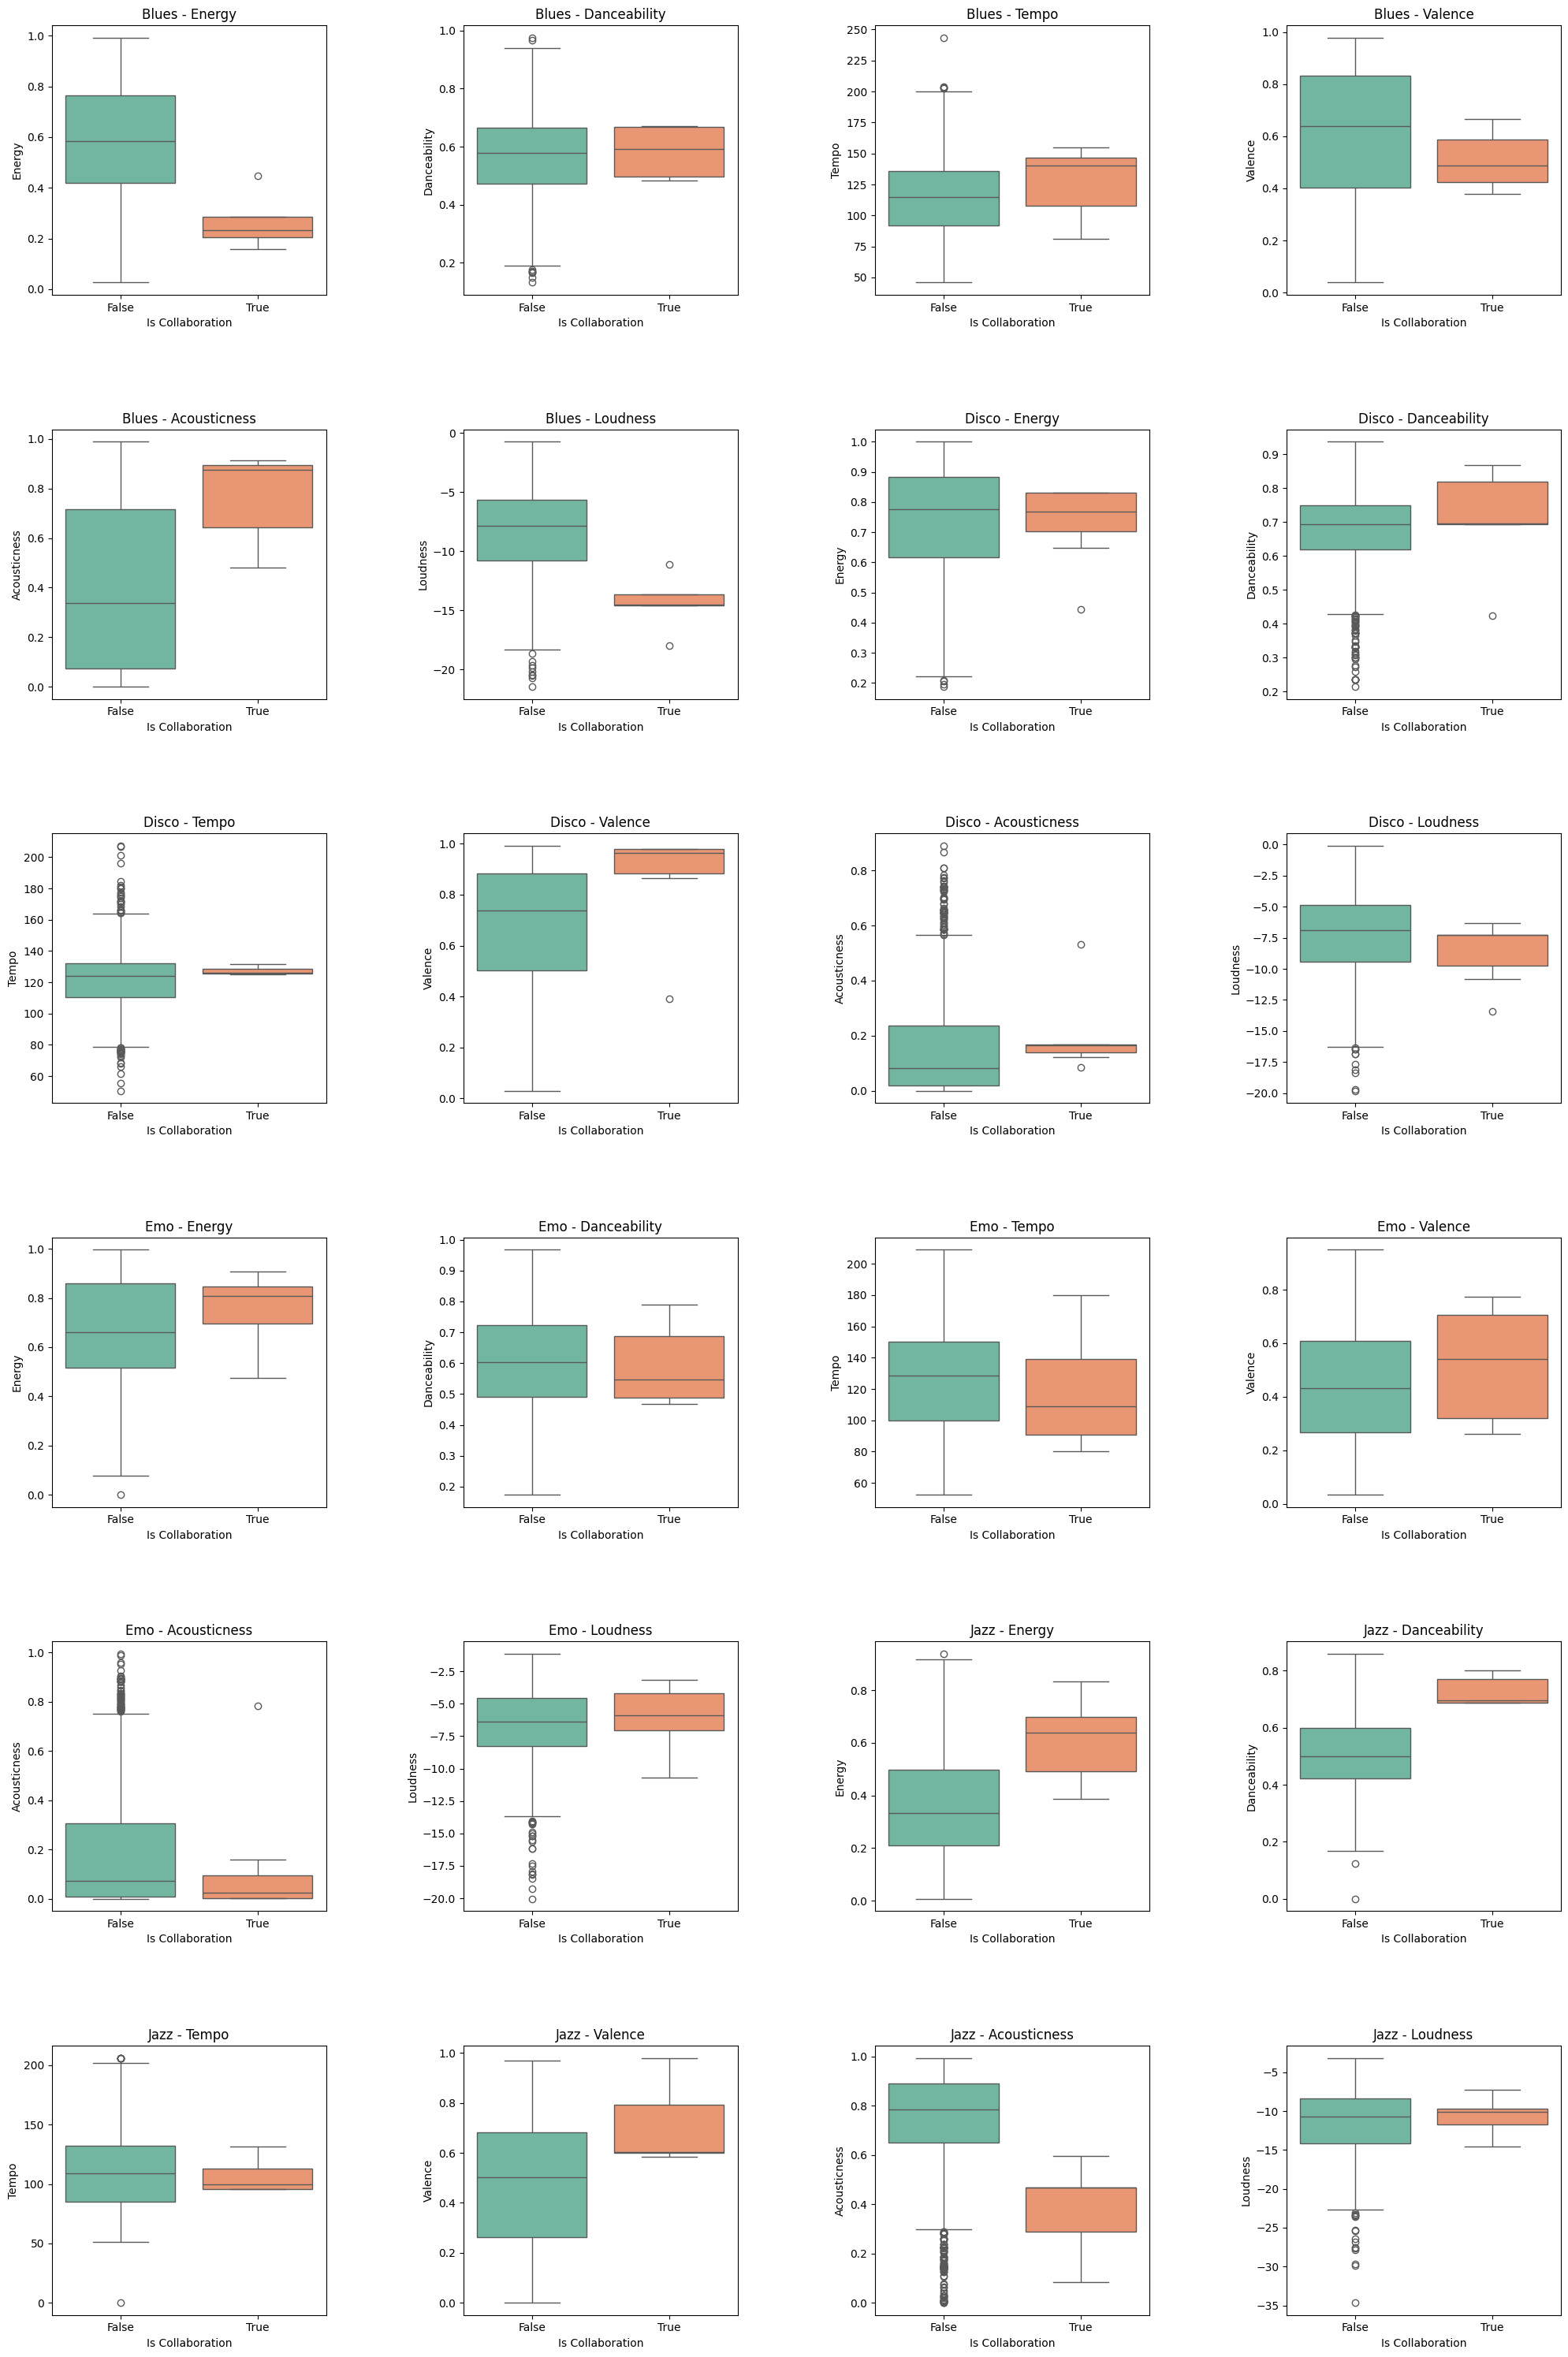

In [72]:
# list of significant results
significant_genres = ['blues', 'disco', 'emo', 'jazz']

# list of attributes
attributes = ['energy', 'danceability', 'tempo', 'valence', 'acousticness', 'loudness']

#create an empty dictionary to store the mean differences
mean_differences = {}

# ccalculate the mean differences between solo and collaborative tracks across genres
for genre in significant_genres:
    genre_data = filtered_data[filtered_data['track_genre'] == genre]
    mean_differences[genre] = genre_data.groupby('is_collaboration')[attributes].mean()

# display the mean differences
for genre, values in mean_differences.items():
    print(f"Genre: {genre.capitalize()}")
    print(values.to_string())
    print("\n")

    
# set up the figure with a 6x4 grid (6 rows, 4 columns)
plt.figure(figsize=(20, 30))

# loop through each genre and attribute to create the boxplots
for i, genre in enumerate(significant_genres):  # 4 genres
    genre_data = filtered_data[filtered_data['track_genre'] == genre]
    
    for j, attribute in enumerate(attributes):  # 6 attributes
        # calculate the correct subplot position
        plot_position = i * len(attributes) + j + 1  # this gives unique indices for each plot
        
        # specify the grid position (6 rows, 4 columns for each genre-attribute combination)
        plt.subplot(6, 4, plot_position)
        
        # create the boxplot
        sns.boxplot(x='is_collaboration', y=attribute, data=genre_data, palette="Set2", hue='is_collaboration', legend=False)
        
        # title and labels for each plot
        plt.title(f'{genre.capitalize()} - {attribute.capitalize()}', fontsize=12)
        plt.xlabel("Is Collaboration")
        plt.ylabel(attribute.capitalize())

# adjust layout to avoid overlap between plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


**1. Blues Genre:**
- Energy: Collaborative tracks have significantly lower energy (0.266 vs. 0.583). This suggests that collaborations in Blues tend to be less energetic, possibly because artists are blending more slow-paced styles.
- Danceability: The difference in danceability is minimal (0.582 vs. 0.569), suggesting that both solo and collaborative tracks in Blues maintain similar levels of danceability.
- Tempo: Collaborations have a higher tempo (126.24 bpm vs. 116.52 bpm), indicating that collaborations might have faster paced tracks, possibly due to a desire for more dynamic collaborations.
- Valence: Solo tracks have a slightly higher valence (0.605 vs. 0.508), suggesting that solo Blues tracks might focus on more positive emotions.
- Acousticness: Collaborative tracks are more acoustic (0.762 vs. 0.396), which could reflect a more natural or organic sound in collaborations.
- Loudness: Solo tracks are louder (-8.49 dB vs. -14.38 dB), which may indicate that solo tracks are produced to sound more aggressive.

**2. Disco Genre:**
- Energy: There is minimal difference in energy between solo (0.738) and collaborative tracks (0.73), suggesting that Disco tracks maintain consistent energy regardless of collaboration.
- Danceability: Collaborative tracks in Disco have a slightly higher danceability (0.717 vs. 0.676), which is expected since collaborations often attract more listeners.
- Tempo: Collaborative tracks have a higher tempo (127.33 bpm vs. 121.94 bpm), indicating that collaborations may lean towards more upbeat.
- Valence: Collaborative tracks have a significantly higher valence (0.866 vs. 0.669), suggesting that collaborations often aim to create positive vibes in Disco.
- Acousticness: Slight difference in acousticness (0.199 vs. 0.166), indicating minimal effect on the acoustic nature of the tracks.
- Loudness: Collaborative Disco tracks are slightly quieter (-8.73 dB vs. -7.41 dB), which may suggest a more subtle or balanced sound in collaborations compared to solo tracks.

**3. Emo Genre:**
- Energy: Collaborative tracks have slightly higher energy (0.769 vs. 0.669), which could indicate that collaborations in Emo might involve intense tracks.
- Danceability: The difference in danceability is minimal (0.590 vs. 0.599), suggesting that both solo and collaborative Emo tracks maintain similar levels of rhythm.
- Tempo: Collaborative tracks have a lower tempo (115.52 bpm vs. 127.11 bpm), which could indicate that collaborations in Emo may focus on slower tracks.
- Valence: Collaborative tracks have a higher valence (0.518 vs. 0.440), suggesting a more positive emotional in collaborations compared to solo tracks.
- Acousticness: Solo tracks are more acoustic (0.196 vs. 0.116), implying that collaborations in Emo might lean towards less organic, more electronically produced sounds.
- Loudness: Collaborative tracks are slightly quieter (-5.92 dB vs. -6.73 dB), which could indicate a more balanced production style in collaborative Emo tracks.

**4. Jazz Genre:**
- Energy: Collaborative tracks have significantly higher energy (0.616 vs. 0.350), which suggests that collaborations in Jazz bring more intensity to the genre.
- Danceability: Collaborative tracks are more danceable (0.730 vs. 0.508), aligning with the idea that collaborations may aim for a smoother, more groove sound in Jazz.
- Tempo: Solo Jazz tracks have a higher tempo (112.71 bpm vs. 105.90 bpm), suggesting that solo tracks in Jazz might lean toward more up tempo rhythms.
- Valence: Collaborative tracks have a higher valence (0.702 vs. 0.488), indicating that collaborations may aim to create a more positive emotional tone.
- Acousticness: Solo tracks are more acoustic (0.719 vs. 0.393), which could reflect a more traditional sound in solo Jazz compared to the more produced sound in collaborations.
- Loudness: Collaborative tracks are louder (-10.50 dB vs. -11.59 dB), which could suggest that collaborations tend to have a more powerful production.